# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from scipy import stats as st
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/games.csv')
display(data.head(10), data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


None

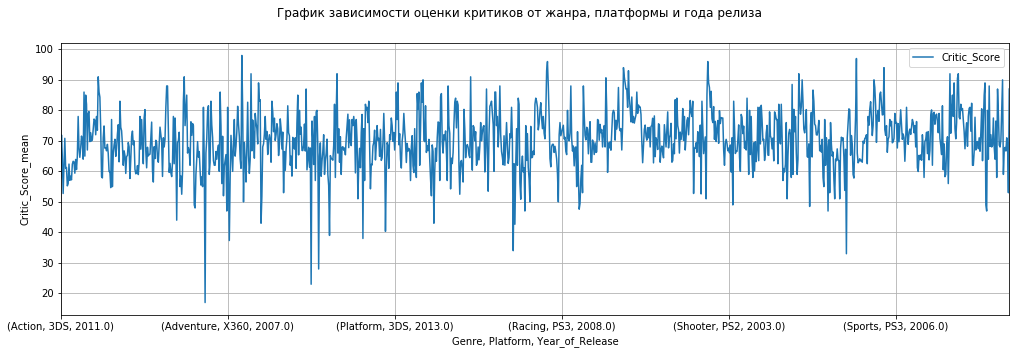

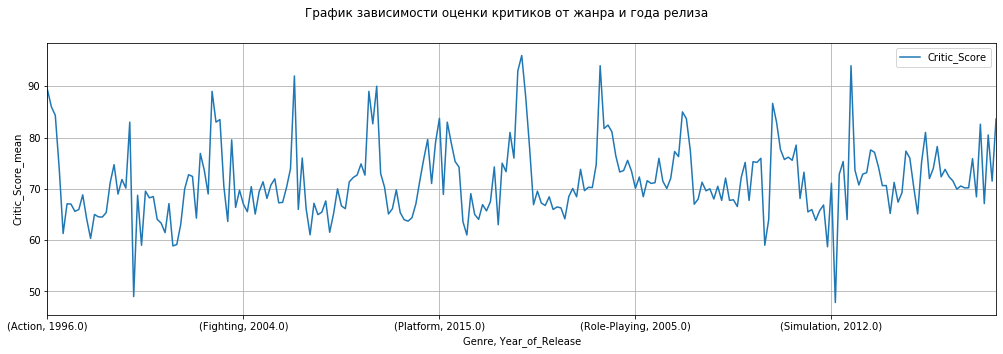

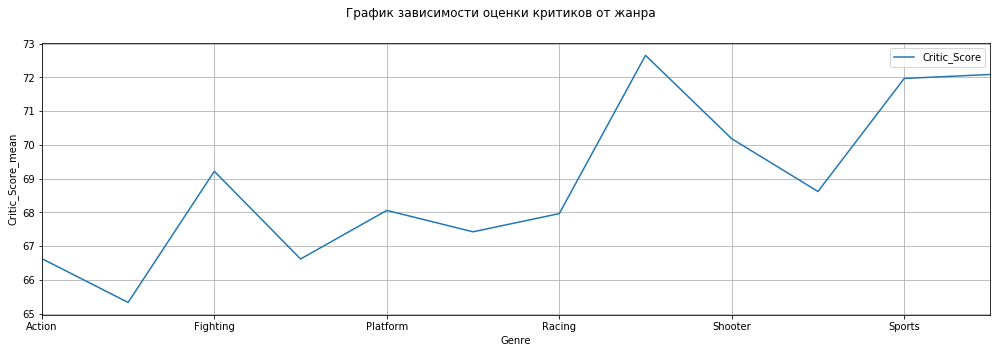

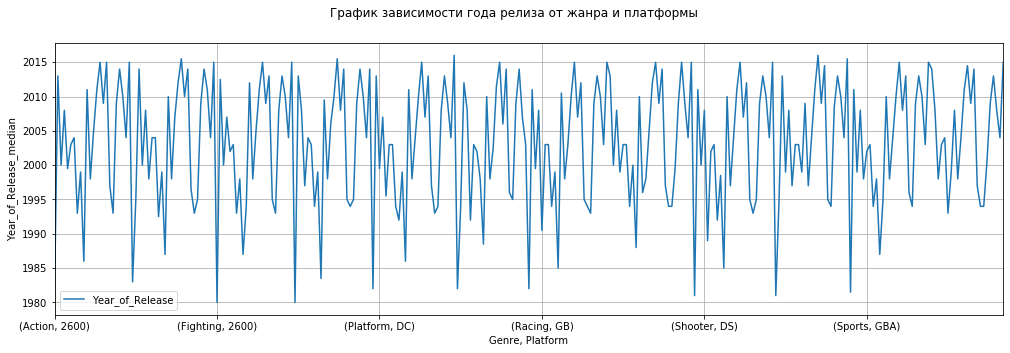

In [2]:
# исследую зависимости для заполнения пропусков в следующем шаге.
def plot(index, values, aggfunc, xlabel, ylabel, suptitle):
    (data
    .pivot_table(index=index, values=values, aggfunc=aggfunc)
    .plot(grid=True, figsize=(17, 5))
    )
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.suptitle(suptitle)
    plt.show()


plot(['Genre', 'Platform', 'Year_of_Release'],
     'Critic_Score', 'mean', 'Genre, Platform, Year_of_Release',
     'Critic_Score_mean', 'График зависимости оценки критиков от жанра, платформы и года релиза')

plot(['Genre', 'Year_of_Release'],
     'Critic_Score', 'mean', 'Genre, Year_of_Release',
     'Critic_Score_mean', 'График зависимости оценки критиков от жанра и года релиза')

plot('Genre', 'Critic_Score', 'mean', 'Genre',
     'Critic_Score_mean', 'График зависимости оценки критиков от жанра')

plot(['Genre', 'Platform'],'Year_of_Release', 'median', 'Genre, Platform',
     'Year_of_Release_median', 'График зависимости года релиза от жанра и платформы')


## Вывод

1. пропуски в `name` невозможно заполнить (если только гуглить)
2. пропуски в `year_of_release` можно заполнить медианами, если сгруппировать по жанрам и платформам
3. пропуски в `genre` невозможно заполнить (если только гуглить)
4. пропуски в `critic_score` можно заполнить средним, сгруппировав по жанру, платформе и году релиза
5. пропуски в `user_score` можно заполнить средним, сгруппировав по жанру, платформе и году релиза или можно заменить на `tbd`
6. пропуски в `rating` не заолнить (если только гуглить)
7. регистр в названиях столбцов
8. тип данных `year_of_release` нужно заменить на `int`
9. тип данных `user_score` нужно заменить на `float`

## Шаг 2. Подготовьте данные

* Замените названия столбцов (приведите к нижнему регистру);
* Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
* Обработайте пропуски при необходимости:
 * Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
 * Опишите причины, которые могли привести к пропускам;
 * Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
* Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [3]:
data.columns = data.columns.str.lower() # приведение к нижнему регистру названий столбцов
data['rating'] = data['rating'].fillna("no rating") # замена пропусков на "no rating"

data['year_of_release'] = (
    data['year_of_release']
    .fillna(
        data
        .groupby(['genre', 'platform'])['year_of_release']
        .transform('median')
    )
) # замена пропусков в year_of_release на основании медианы по столбцам 'genre', 'platform'
data['year_of_release'] = data['year_of_release'].astype(int) # замена типа данных с float на int

data['user_score'] = data['user_score'].replace('tbd', np.nan).astype(float) # замена tbd на NaN и типа данных на float

data['name'] = data['name'].fillna("no name") # заменяю пропуски
data['genre'] = data['genre'].fillna("no genre") # заменяю пропуски

data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             16715 non-null object
total_sales        16715 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


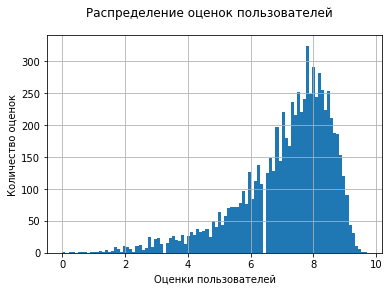

In [4]:
data['user_score'].hist(bins=100)
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество оценок')
plt.suptitle('Распределение оценок пользователей')
plt.show()

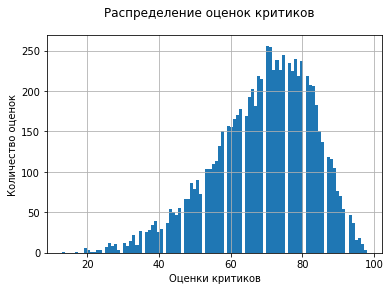

In [5]:
data['critic_score'].hist(bins=100)
plt.xlabel('Оценки критиков')
plt.ylabel('Количество оценок')
plt.suptitle('Распределение оценок критиков')
plt.show()

## Вывод

В данном шаге:
1. изменил регистр в названиях столбцов
2. изменил тип данных в year_of_release на int
3. изменил тип данных в user_score на float
4. заменил в user_score tbd(To Be Determined) на NaN, так как посчитал их за пропуски в данных.
5. Для critic_score:

Оставил NaN, не стал ничем заменять.

6. Для user_score:

Оставил NaN, не стал ничем заменять.

7. Заменил пропуски на `'no rating'` в столбце `rating`
8. Так как здесь нет данных, которые нужно вводить вручную пользователям, то исключаю возможность появления пропусков вследствие невнимательности человека. Скорее всего данные утеряны в результате какого-то сбоя.
9. Заменил пропуски в `name и genre` на `"no name" и "no genre"`.
10. Добавил столбец `total_sales` с суммарными продажами во всех регионах
11. После заполнения видно, что распределения оценок и критиков и пользователей являются нормальными и имеют небольшую отрицательную скошенность.

## Шаг 3. Проведите исследовательский анализ данных

* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не учитывайте в работе данные за предыдущие годы.
* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
* Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
* Соотнесите выводы с продажами игр на других платформах.
* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

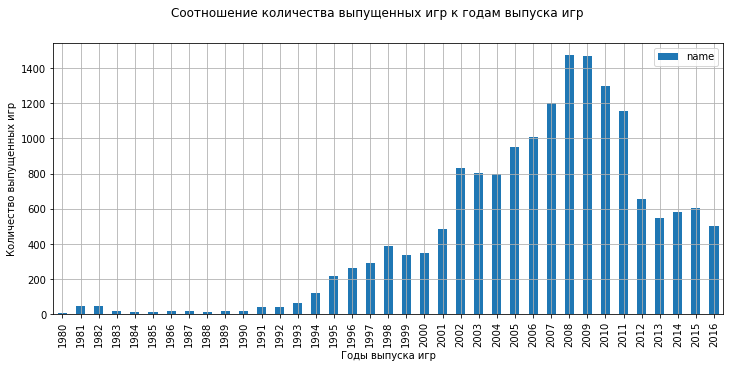

In [6]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar', figsize=(12,5), grid=True)
plt.xlabel('Годы выпуска игр')
plt.ylabel('Количество выпущенных игр')
plt.suptitle('Соотношение количества выпущенных игр к годам выпуска игр')
plt.show()

Судя по графику, можно отбросить данные до 1995 года, так как там меньше 200 игр в год выпускалось.

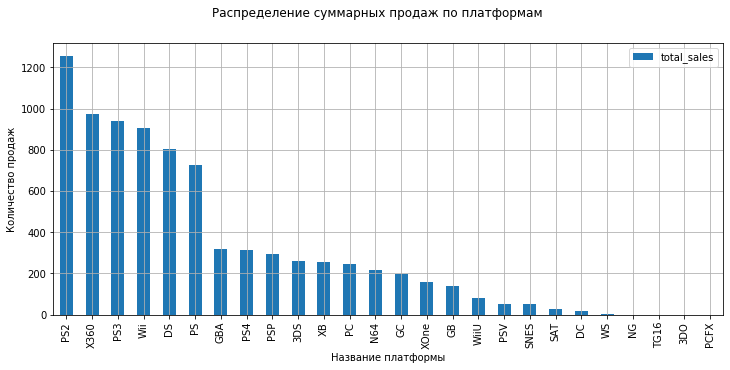

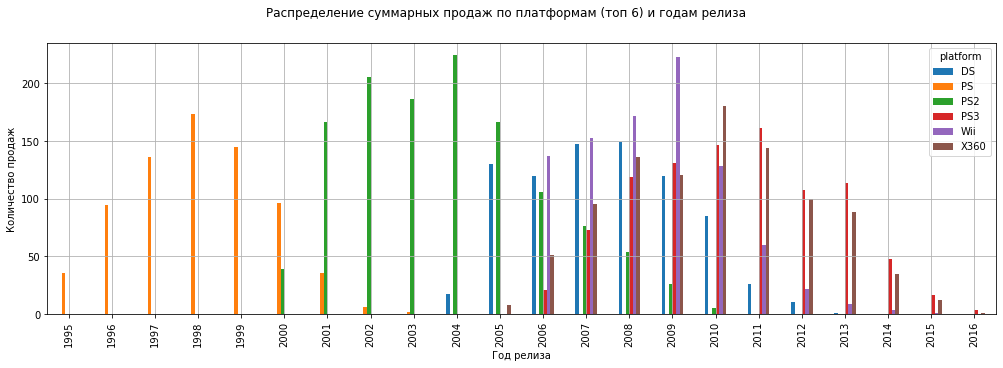

In [7]:
(data
 .query('year_of_release >= 1995')
 .pivot_table(index='platform', values='total_sales', aggfunc='sum')
 .sort_values(by='total_sales', ascending=False)
 .plot(kind='bar', figsize=(12,5), grid=True)
)
plt.xlabel('Название платформы')
plt.ylabel('Количество продаж')
plt.suptitle('Распределение суммарных продаж по платформам')
plt.show()

(data
 .query('year_of_release >= 1995 & platform == ("PS2", "X360", "PS3", "Wii", "DS", "PS")')
 .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
 .plot(kind='bar', figsize=(17,5), grid=True)
)
plt.xlabel('Год релиза')
plt.ylabel('Количество продаж')
plt.suptitle('Распределение суммарных продаж по платформам (топ 6) и годам релиза')
plt.show()

In [8]:
(data
 .query('year_of_release >= 1995 & platform == ("PS2", "X360", "PS3", "Wii", "DS", "PS")')
 .groupby('platform')['year_of_release'].nunique().sum()/6
)

10.833333333333334

Глядя на график распределения суммарных продаж по платформам можно сказать, что наиболее популярны - PS2, X360, PS3, Wii, DS и PS. В ходе исследования обнаруживаю, что в среднем платформы существуют по 10.8 лет. И период, когда на платформе хорошо продаются игры составляет с 1 года до 7-9 года, следовательно отбрасываю все игры с годом релиза до 2011.


Все платформы включать не стоит, ведь тот же PC был и при PS2 и при PS3 и при PS4.

In [9]:
new_data = (
    data
    .query('2011 <= year_of_release')
    .reset_index(drop=True)
)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4052 entries, 0 to 4051
Data columns (total 12 columns):
name               4052 non-null object
platform           4052 non-null object
year_of_release    4052 non-null int64
genre              4052 non-null object
na_sales           4052 non-null float64
eu_sales           4052 non-null float64
jp_sales           4052 non-null float64
other_sales        4052 non-null float64
critic_score       1829 non-null float64
user_score         2051 non-null float64
rating             4052 non-null object
total_sales        4052 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 380.0+ KB


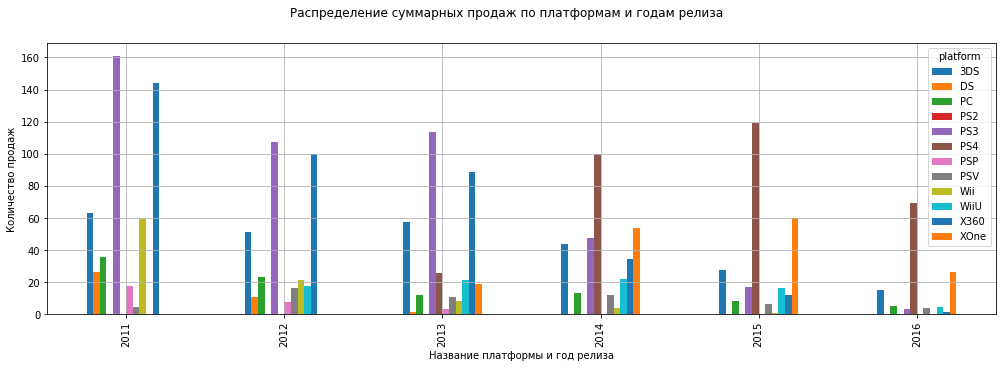

In [10]:
(new_data
 .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
 .plot(kind='bar', figsize=(17,5), grid=True)
)
plt.xlabel('Название платформы и год релиза')
plt.ylabel('Количество продаж')
plt.suptitle('Распределение суммарных продаж по платформам и годам релиза')
plt.show()

Среди платформ за выбранный период не обнаружено ни одной с растущими продажами, абсолютно у всех платформ они падают. Из них лидируют по продажам - PS3, PS4 и X360.

In [11]:
new_data = new_data.query('platform == ("PS4", "XOne", "3DS", "PC", "PSV", "WiiU")').reset_index(drop=True)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 12 columns):
name               2130 non-null object
platform           2130 non-null object
year_of_release    2130 non-null int64
genre              2130 non-null object
na_sales           2130 non-null float64
eu_sales           2130 non-null float64
jp_sales           2130 non-null float64
other_sales        2130 non-null float64
critic_score       1093 non-null float64
user_score         1168 non-null float64
rating             2130 non-null object
total_sales        2130 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 199.8+ KB


Потенциально прибыльными платформами считаю PS4, XOne, 3DS, PC, PSV, WiiU.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


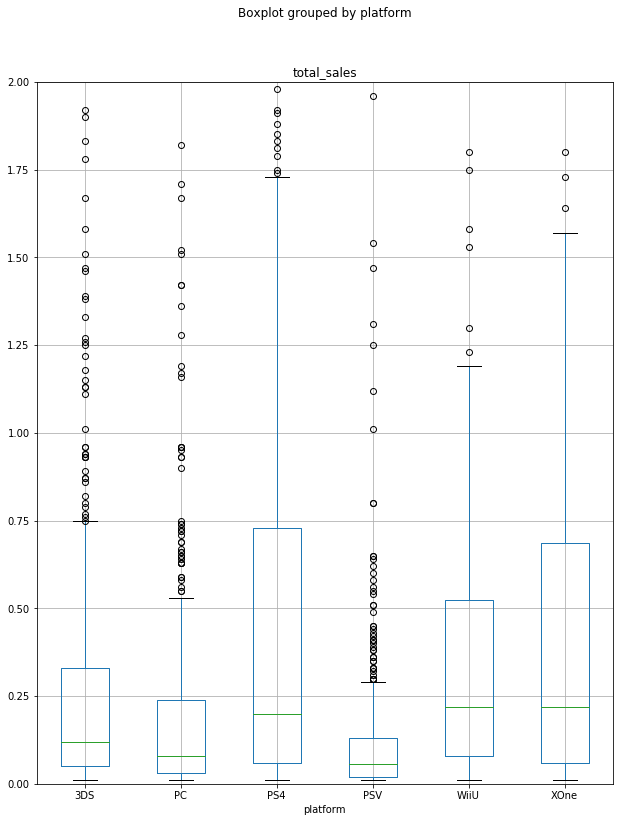

In [12]:
(new_data
 .boxplot(by='platform', column='total_sales', figsize=(10,13))
 .set_ylim(0,2)
)
plt.show()

По boxplot видно, что медианы гораздо сильнее стремятся к 1 квартилю, это означает, что для этих 6 платформ характерно сходство: абсолютное большинство выпущенных после 2011 года игр продаются в очень малых количествах (до 100тыс. копий). Третьи же квартили находятся далеко от медиан, и чем больше у платформы продаж, тем больше это расстояние. Тоесть получается, что основные продажы топ-платформам делают ААА проекты, которых абсолютное меньшинство, а учитывая, что в топе находятся консоли, то можно предположить, что это эксклюзивы.

Так же можно предположить почему у PC так мало продаж - скорее всего, дело в пиратах, ну и нет консольных эксклюзивов.

,critic_score,total_sales,user_score
critic_score,1.000000,0.406568,0.557654
total_sales,0.406568,1.000000,-0.031957
user_score,0.557654,-0.031957,1.000000


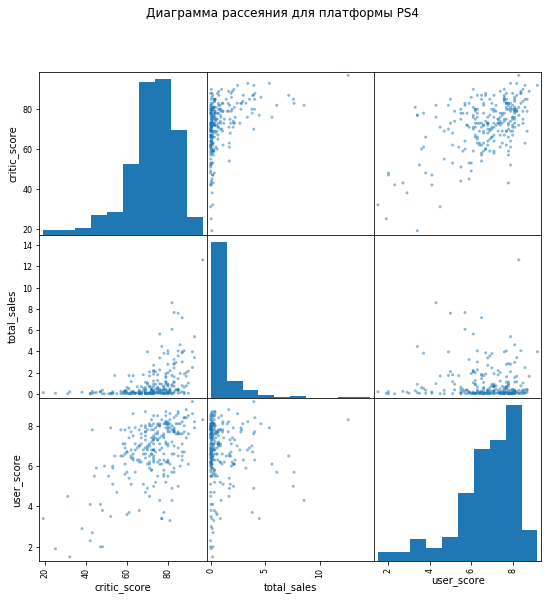

,critic_score,total_sales,user_score
critic_score,1.000000,0.416998,0.472462
total_sales,0.416998,1.000000,-0.068925
user_score,0.472462,-0.068925,1.000000


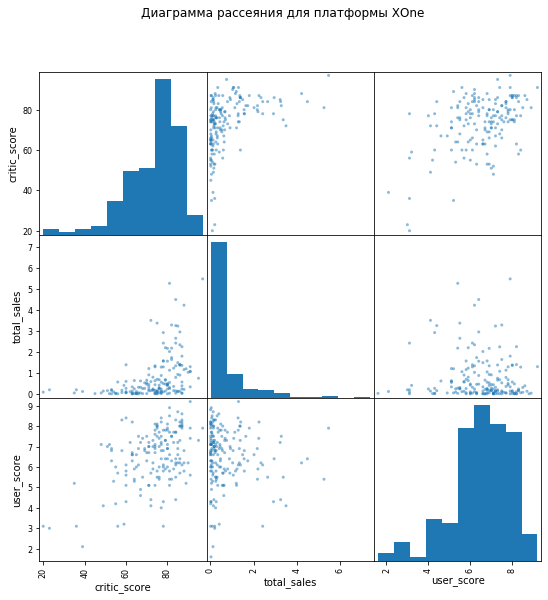

,critic_score,total_sales,user_score
critic_score,1.00000,0.348380,0.770080
total_sales,0.34838,1.000000,0.400219
user_score,0.77008,0.400219,1.000000


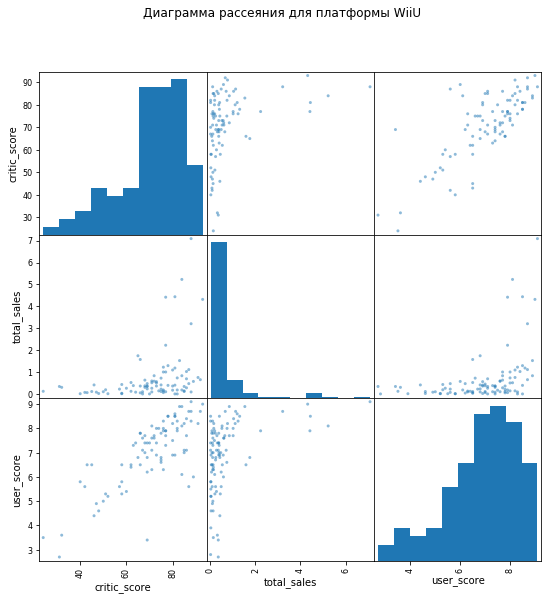

In [13]:
data_matrix = (
 new_data
 .query('platform == "PS4"')
 .reset_index(drop=True)
)
data_matrix = (
 data_matrix
 .pivot_table(index=data_matrix.index, values=['user_score', 'critic_score', 'total_sales'])
)
display(data_matrix.corr())
pd.plotting.scatter_matrix(data_matrix, figsize=(9, 9))
plt.suptitle('Диаграмма рассеяния для платформы PS4')
plt.show()

data_matrix = (
 new_data
 .query('platform == "XOne"')
 .reset_index(drop=True)
)
data_matrix = (
 data_matrix
 .pivot_table(index=data_matrix.index, values=['user_score', 'critic_score', 'total_sales'])
)
display(data_matrix.corr())
pd.plotting.scatter_matrix(data_matrix, figsize=(9, 9))
plt.suptitle('Диаграмма рассеяния для платформы XOne')
plt.show()

data_matrix = (
 new_data
 .query('platform == "WiiU"')
 .reset_index(drop=True)
)
data_matrix = (
 data_matrix
 .pivot_table(index=data_matrix.index, values=['user_score', 'critic_score', 'total_sales'])
)
display(data_matrix.corr())
pd.plotting.scatter_matrix(data_matrix, figsize=(9, 9))
plt.suptitle('Диаграмма рассеяния для платформы WiiU')
plt.show()

По диаграмме рассеяния видно:

для платформы PS4 оценки критиков оказывают среднее влияние на итоговые продажи и коэффициент корреляции 0.40, а вот оценки пользователей вообще не влияют на продажи игр. Также можно заметить, что корреляция между оценками пользователей и критиков составляет 0.55.

для платформы XOne оценки критиков оказывают среднее влияние на итоговые продажи и коэффициент корреляции 0.41, а вот оценки пользователей вообще не влияют на продажи игр. Также можно заметить, что корреляция между оценками пользователей и критиков составляет 0.47.

для платформы WiiU оценки критиков оказывают влияние ниже, чем у первых двух на итоговые продажи и коэффициент корреляции 0.34, зато у оценок пользователей корреляция 0.40. Также можно заметить, что корреляция между оценками пользователей и критиков составляет 0.77.

В итоге получается следующее: пользователи, независимо от платформы, прислушиваются ко мнению критиков, но мнение пользователей в почете только у владельцев консоли от nintendo.

Вижу в этом прямую взаимосвязь: всегда игры заранее выдаются авторитетным изданиям и люди могут увидеть геймплей, как он есть именно от критиков, и огромное число геймеров предзаказывают игры, тоесть на момент, когда появятся первые пользовательские оценки большинство уже будут сами играть.

Почему же у WiiU не так? Игры, актуальные для nintendo - заплесневевший оверпрайснутый хлам для ЦЕНИТЕЛЕЙ и потому люди очень не спешат тратить деньги и хотят сначала узнать как можно больше мнений об игре.

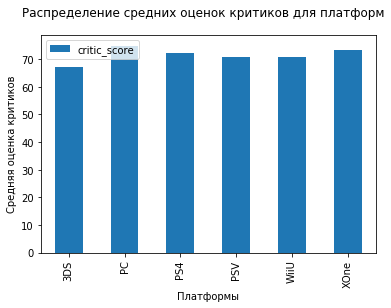

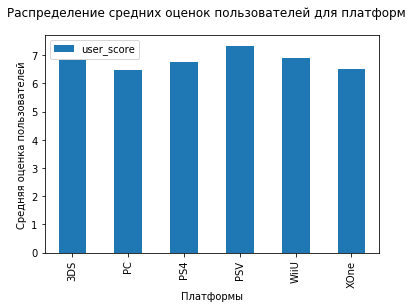

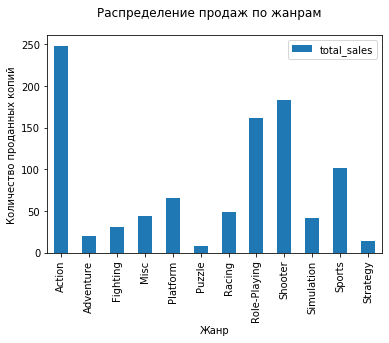

In [14]:
new_data.pivot_table(index='platform', values='critic_score', aggfunc='mean').plot(kind='bar')
plt.xlabel('Платформы')
plt.ylabel('Средняя оценка критиков')
plt.suptitle('Распределение средних оценок критиков для платформ')
plt.show()
new_data.pivot_table(index='platform', values='user_score', aggfunc='mean').plot(kind='bar')
plt.xlabel('Платформы')
plt.ylabel('Средняя оценка пользователей')
plt.suptitle('Распределение средних оценок пользователей для платформ')
plt.show()
new_data.pivot_table(index='genre', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий')
plt.suptitle('Распределение продаж по жанрам')
plt.show()

## Вывод

* Далее я построил еще пару графиков, чтобы наглядно оценить распределение оценок пользователей и критиков по платформам, и обнаружил, что и критики и пользователи оценивают игры без предвзятости к каким-либо платформам.


* Отсюда делаю вывод, что на PS3 и PC также продажи будут зависеть от мнения критиков и не зависеть от мнения пользователей, а вот 3DS тоже от nintendo и тоже люди будут прислушиваться к мнению олдфагов.


* По графику "Распределение продаж по жанрам" видно, что самые прибыльные жанры - Action, Shooter, Role-Playing и Sports, а с низкими продажами - Puzzle, Strategy и Adventure.

## Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [15]:
display(
(new_data
 .pivot_table(index='platform', values='na_sales', aggfunc='sum')
 .sort_values(by='na_sales', ascending=False)
 .head(5)),
(new_data
 .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
 .sort_values(by='eu_sales', ascending=False)
 .head(5)),
(new_data
 .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
 .sort_values(by='jp_sales', ascending=False)
 .head(5))
)

,na_sales
platform,
PS4,108.74
XOne,93.12
3DS,83.49
WiiU,38.10
PC,30.08


,eu_sales
platform,
PS4,141.09
3DS,61.48
PC,57.37
XOne,51.59
WiiU,25.13


,jp_sales
platform,
3DS,100.67
PSV,21.91
PS4,15.96
WiiU,13.01
XOne,0.34


In [16]:
display(
(new_data.pivot_table(index='genre', values='na_sales', aggfunc='sum')
 .sort_values(by='na_sales', ascending=False)
 .head(5)),
(new_data
 .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
 .sort_values(by='eu_sales', ascending=False)
 .head(5)),
(new_data
 .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
 .sort_values(by='jp_sales', ascending=False)
 .head(5))
)

,na_sales
genre,
Action,93.72
Shooter,81.86
Role-Playing,52.11
Sports,40.04
Platform,26.97


,eu_sales
genre,
Action,91.02
Shooter,72.94
Sports,43.66
Role-Playing,42.96
Platform,22.30


,jp_sales
genre,
Role-Playing,54.29
Action,36.54
Platform,10.71
Misc,10.70
Simulation,10.64


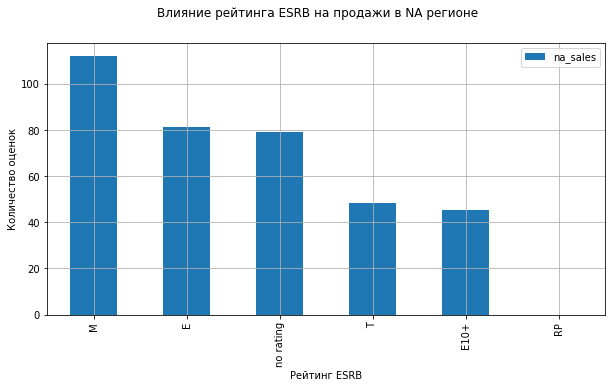

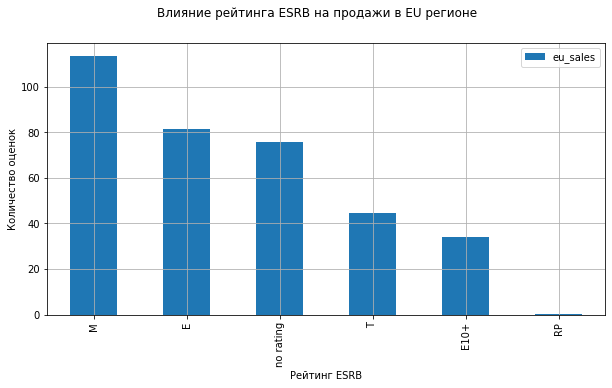

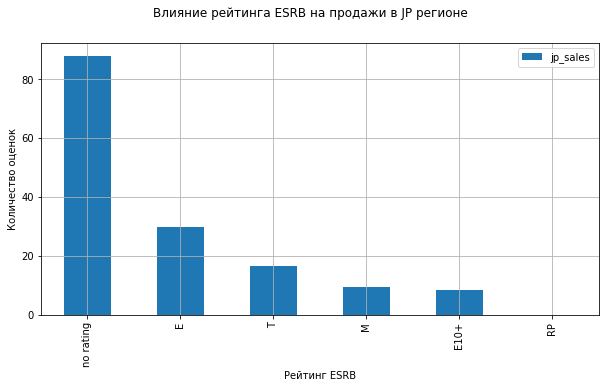

In [17]:
(new_data
 .pivot_table(index='rating', values='na_sales', aggfunc='sum')
 .sort_values(by='na_sales', ascending=False)
 .plot(kind='bar', figsize=(10,5), grid=True)
)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество оценок')
plt.suptitle('Влияние рейтинга ESRB на продажи в NA регионе')
plt.show()

(new_data
 .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
 .sort_values(by='eu_sales', ascending=False)
 .plot(kind='bar', figsize=(10,5), grid=True)
)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество оценок')
plt.suptitle('Влияние рейтинга ESRB на продажи в EU регионе')
plt.show()

(new_data
 .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
 .sort_values(by='jp_sales', ascending=False)
 .plot(kind='bar', figsize=(10,5), grid=True)
)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество оценок')
plt.suptitle('Влияние рейтинга ESRB на продажи в JP регионе')
plt.show()


## Вывод

В данном шаге я выяснил, что:
* Для `NA` региона характерны платформы `PS4 (108 млн), XOne (93 млн), 3DS (83.5 млн)`, и в меньшей степени `WiiU (38 млн) и PC (30 млн)`
* Жанры: `Action (94 млн) и Shooter (82 млн)`, и в меньшей степени `Role-Playing (52 млн), Sports (40 млн) и Platform (27 млн)`
* Рейтинг `ESRB` влият на количество проданных копий - больше всего с `M` и меньше всего с `RP`


* Для `EU` региона характерна платформа `PS4 (141 млн)`, далее идут платформы `3DS (61 млн), PC (57 млн), XOne (52 млн)` и меньше всего продаж для платформы `WiiU (25 млн)`
* Жанры: `Action (91 млн) и Shooter (73 млн)`, далее `Sports (44 млн), Role-Playing (43 млн) и Platform (22 млн)`
* Рейтинг `ESRB` влият на количество проданных копий - больше всего с `M` и меньше всего с `RP`, как и в `NA` регионе.

* Для `JP` региона характерна платформа `3DS (100 млн)`, далее идут платформы `PSV (22 млн), PS4 (16 млн), WiiU (13 млн)` и меньше всего продаж для платформы `XOne (0.34 млн)`
* Жанры: `Role-Playing (54 млн) и Action (37 млн)`, далее `Platform (11 млн), Misc (11 млн), Simulation (11 млн)`
* Рейтинг `ESRB` влият на количество проданных копий - больше всего с `E` и меньше всего с `RP`.


Видно, что у пользователей из `NA и EU` регионов вцелом похожи предпочтения и по жанрам и по платформам и рейтинг `ESRB` одинаково влияет на продажи, но в регионе `JP` всё не как у людей.

## Шаг 5. Проверьте гипотезы

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:

* Как вы сформулировали нулевую и альтернативную гипотезы;
* Какой критерий применили для проверки гипотез и почему.

* H0 в 1 случае означает, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Н1 в 1 случае означает, что средние пользовательские рейтинги платформ Xbox One и PC НЕ одинаковые


* H0 во 2 случае означает, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») НЕ разные.
* Н1 во 2 случае означает, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

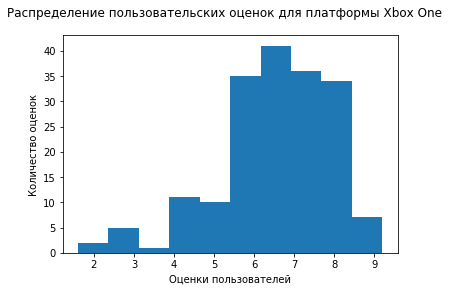

Дисперсия: 1.9069968429360695, среднее: 6.521428571428572


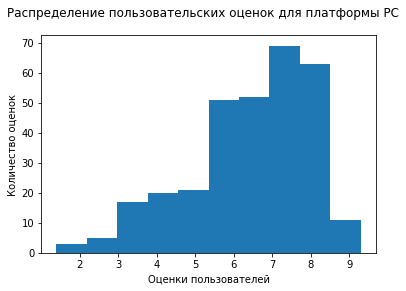

Дисперсия: 2.5903214403495753, среднее: 6.466987179487179
Проверка дисперсии выборок: 26.37991512440588
р-значение: 0.6913727965077464
Не получилось отвергнуть нулевую гипотезу


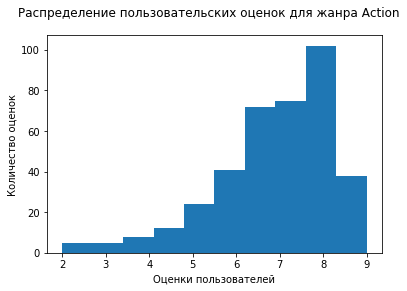

Дисперсия: 1.8029702079124927, среднее: 6.8306282722513085


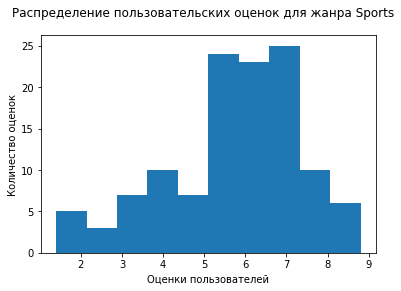

Дисперсия: 2.647170168067227, среднее: 5.7175
Проверка дисперсии выборок: 31.89065706233416
р-значение: 1.6159410297392528e-10
Отвергаем нулевую гипотезу


In [18]:
new_data_filt = new_data[new_data['user_score'].notna()]
new_data_filt.query('platform == "XOne"')['user_score'].plot(kind='hist') # смотрю на тип распределения
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество оценок')
plt.suptitle('Распределение пользовательских оценок для платформы Xbox One')
plt.show()
print('Дисперсия: {0}, среднее: {1}'.format(new_data_filt.query('platform == "XOne"')['user_score'].var(ddof=1), new_data_filt.query('platform == "XOne"')['user_score'].mean()))
new_data_filt.query('platform == "PC"')['user_score'].plot(kind='hist') # смотрю на тип распределения
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество оценок')
plt.suptitle('Распределение пользовательских оценок для платформы PC')
plt.show()
print('Дисперсия: {0}, среднее: {1}'.format(new_data_filt.query('platform == "PC"')['user_score'].var(ddof=1), new_data_filt.query('platform == "PC"')['user_score'].mean()))

print('Проверка дисперсии выборок:',((new_data_filt.query('platform == "PC"')['user_score'].var(ddof=1)
       - new_data_filt.query('platform == "XOne"')['user_score'].var(ddof=1))
      / new_data_filt.query('platform == "PC"')['user_score'].var(ddof=1)) * 100) 

alpha = .05
results = st.ttest_ind(
    new_data_filt.query('platform == "XOne"')['user_score'],
    new_data_filt.query('platform == "PC"')['user_score'],
    equal_var=False
)

print('р-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
new_data_filt.query('genre == "Action"')['user_score'].plot(kind='hist') # смотрю на тип распределения
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество оценок')
plt.suptitle('Распределение пользовательских оценок для жанра Action')
plt.show()
print('Дисперсия: {0}, среднее: {1}'.format(new_data_filt.query('genre == "Action"')['user_score'].var(ddof=1), new_data_filt.query('genre == "Action"')['user_score'].mean()))
new_data_filt.query('genre == "Sports"')['user_score'].plot(kind='hist') # смотрю на тип распределения
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество оценок')
plt.suptitle('Распределение пользовательских оценок для жанра Sports')
plt.show()
print('Дисперсия: {0}, среднее: {1}'.format(new_data_filt.query('genre == "Sports"')['user_score'].var(ddof=1), new_data_filt.query('genre == "Sports"')['user_score'].mean()))

print('Проверка дисперсии выборок:',((new_data_filt.query('genre == "Sports"')['user_score'].var(ddof=1)
       - new_data_filt.query('genre == "Action"')['user_score'].var(ddof=1))
      / new_data_filt.query('genre == "Sports"')['user_score'].var(ddof=1)) * 100) 


alpha = .01
results = st.ttest_ind(
    new_data_filt.query('genre == "Action"')['user_score'],
    new_data_filt.query('genre == "Sports"')['user_score'],
    equal_var=False
)

print('р-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

## Вывод

* Для обеих пар видно, что распределения значений на графиках являются нормальными и имеют отрицательную скошенность.


* В обеих гипотезах я задал alpha отталкиваясь от значения p-value и исходя из общепринятых значений в 1% и 5%, и первый раз не получилось отклонить нулевую гипотезу, а во второй раз отверг нулевую гипотезу, что абсолютно верно, ведь разница по оценкам между платформами отсутствует, а разница между жанрами есть и сотавляет 1.1 балл.


* Я использовал t-критерий Стьюдента для независимых выборок, потому как я сравнивал оба раза средние из выборок, различающихся по параметрам: в первом случае по платформе, во втором по жанру. Если бы я использовал одну выборку и сравнение проводил бы с ней же, но поменяв в ней значения одного из столбцов, то в этом случае использовал бы t-критерий Стьюдента для связанных выборок.

## Шаг 6. Напишите общий вывод

В ходе работы над проектом мной было установлено, что потенциально популярный продукт на 2017 год - это:
    
* игры для платформ PS4, XOne, 3DS, PC, PSV, WiiU;
* игры жанров Action, Shooter, Role-Playing, Sports, Platform, Misc, Simulation
* с рейтингом ESRB M, E, T, E10+
* для каждого из регионов рекламная компания должна делать акцент на определённые платформы, рейтинг ESRB и жанры.


Так для NA самый популярный продукт это:
* для платформ PS4, XOne или 3DS
* с жанрами Action и Shooter
* c рейтингом M

Для EU:
* для платформы PS4
* с жанрами Action и Shooter
* c рейтингом M

Для JP:
* для платформы 3DS
* с жанрами Role-Playing и Action
* c рейтингом E